<a href="https://colab.research.google.com/github/praveenswork/100-Days-PyProjects/blob/main/test_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

class KMeansFromScratch:
    def __init__(self, n_clusters=4, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            labels = self._assign_clusters(X, self.centroids)
            new_centroids = self._update_centroids(X, labels)

            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = labels
        return self

    def predict(self, X):
        return self._assign_clusters(X, self.centroids)


In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(
    n_samples=600,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

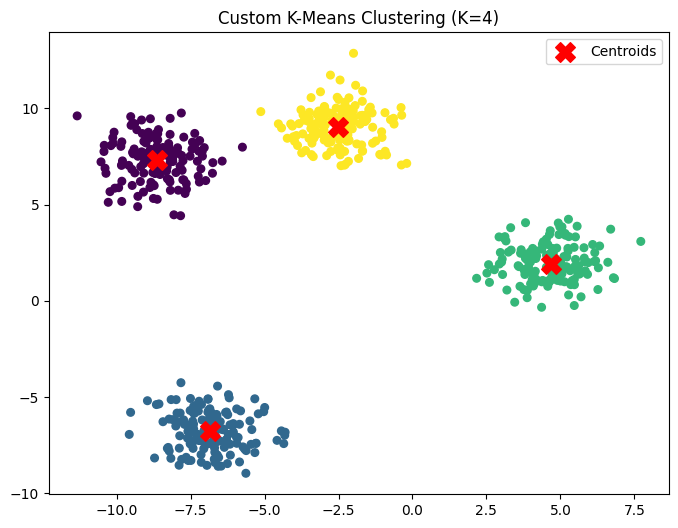

In [3]:
import matplotlib.pyplot as plt

kmeans_custom = KMeansFromScratch(n_clusters=4, random_state=42)
kmeans_custom.fit(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_custom.labels_, cmap="viridis", s=30)
plt.scatter(
    kmeans_custom.centroids[:, 0],
    kmeans_custom.centroids[:, 1],
    c="red",
    marker="X",
    s=200,
    label="Centroids"
)
plt.title("Custom K-Means Clustering (K=4)")
plt.legend()
plt.show()